In [14]:
from tensorflow import keras
from tensorflow.keras.datasets import reuters 
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

In [ ]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=1000, test_split = 0.2)

In [4]:
category = np.max(y_train) + 1
print(category, '카테고리')
print(len(x_train), '학습용 뉴스 기사')
print(len(x_test), '테스트용 뉴스 기사')
print(x_train[0])

46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [8]:
np.unique(y_train, return_counts = True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64),
 array([  55,  432,   74, 3159, 1949,   17,   48,   16,  139,  101,  124,
         390,   49,  172,   26,   20,  444,   39,   66,  549,  269,  100,
          15,   41,   62,   92,   24,   15,   48,   19,   45,   39,   32,
          11,   50,   10,   49,   19,   19,   24,   36,   30,   13,   21,
          12,   18], dtype=int64))

In [9]:
# 단어장 만들기
word_index = reuters.get_word_index()

In [10]:
idx2word = {0 : '<PAD>', 1 : '<S>', 2 : '<UNK>'}

In [11]:
idx2word.update({value + 3 : key for key, value in word_index.items()})

In [12]:
" ".join(map(lambda x : idx2word[x], x_train[0]))

'<S> <UNK> <UNK> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

# 맛집 코드 분석 
- 상일몬

In [41]:
# 카테고리당 100개(해골물 버전)
# 실제로는 1000개로 돌아감 
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words = 1000) 

In [42]:
x_train.shape, x_test.shape

((8982,), (2246,))

In [43]:
length = np.array([len(x) for x in x_train])

In [44]:
# 길이 평균값과 중간값 
print(np.mean(length), np.median(length), np.min(length), np.max(length))

145.5398574927633 95.0 13 2376


In [57]:
# 전체word_index 단어수
len(word_index.keys())

30979

## 데이터 전처리

In [13]:
whole_list = [j for i in x_train for j in i]

In [18]:
df = pd.DataFrame(whole_list)

In [19]:
df.head()

,0
0,1
1,2
2,2
3,8
4,43


- 문장들 for 문 돌려서 각각의 단어들을 나열함 

In [20]:
df.shape

(1307239, 1)

In [21]:
# count 라는 컬럼을 만듦
df['count'] = 1

In [22]:
# 0 컬럼들을 기준으로 잡고, 단어들 끼리 기준을잡음
df_count = df.groupby(0).sum().sort_values(by = 'count', ascending = False)

In [23]:
# '2' 단어가  93750
df_count

,count
0,
2,93750
4,65949
5,33791
6,32262
7,26309
...,...
4474,11
3049,10
4284,10


In [24]:
df_count['word'] = pd.Series(df_count.index).map(lambda x: idx2word[x])

In [30]:
# 너무 자주 등장하는 녀석들 제거
df_count.head(10)

,count,word
0,,
2,93750,of
4,65949,in
5,33791,said
6,32262,and
7,26309,a
8,23857,mln
9,23841,3
10,23610,for
11,15823,vs


In [26]:
remove_list = df_count[df_count['count'] >= len(x_train) / 2]['word'].tolist()

In [27]:
len(x_train)

8982

In [28]:
remove_list.remove("<S>")

In [29]:
[word_index[i] for i in remove_list]

[2,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 1,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38]

In [32]:
# x_train 과는 무관한 코드
for i in x_train:
    try:
        i.remove([word_index[i] for i in remove_list])
        i.remove(0)
        
    except:
        pass

In [61]:
remove_list2 = [word_index[i] for i in remove_list]

In [62]:
x_train2 = []
for i in x_train:
    arr_removed = [j for j in i if j not in remove_list2]
    x_train2.append(arr_removed)

In [63]:
x_test2 = []
for i in x_test:
    arr_removed = [j for j in i if j not in remove_list2]
    x_test2.append(arr_removed)

In [64]:
x_test2

[[697,
  111,
  109,
  150,
  244,
  364,
  333,
  159,
  363,
  71,
  71,
  117,
  225,
  78,
  206,
  270,
  748,
  48,
  207,
  966,
  793,
  97,
  133,
  336,
  493,
  98,
  273,
  104,
  284,
  39,
  338,
  905,
  220,
  644,
  59,
  119,
  61,
  58,
  579,
  67,
  738,
  98,
  43,
  88,
  333,
  722,
  746,
  855,
  129,
  783,
  244,
  364,
  51,
  299,
  452,
  515,
  99,
  364,
  281,
  48,
  644,
  47,
  324,
  56,
  192,
  510],
 [283,
  122,
  89,
  544,
  463,
  798,
  748,
  40,
  85,
  306,
  59,
  82,
  84,
  82,
  52,
  283,
  558,
  265,
  118,
  371,
  281,
  143,
  760,
  50,
  225,
  139,
  683,
  48,
  193,
  862,
  41,
  967,
  602,
  82,
  89,
  544,
  463,
  41,
  260,
  951,
  69,
  82,
  41,
  306,
  283,
  555,
  649,
  82,
  282,
  132,
  82,
  41,
  385,
  169,
  76,
  107,
  106,
  524,
  295,
  41,
  263,
  84,
  395,
  649,
  82,
  838,
  572,
  106,
  595,
  40,
  85,
  518,
  51,
  115,
  680,
  719,
  250,
  429,
  114,
  343,
  84,
  142,
  65,
  49

In [31]:
x_train[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

- x_train 이라는 애에서 i 를 뺏음 
- 그렇기때문에 위의 코드는 x_train과는 관련이 없음

##  데이터 분할 및 간단한 전처리 

In [45]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state= 7)

In [1]:
train_seq = pad_sequences(x_train, maxlen = 100, truncating= 'post')
val_seq = pad_sequences(x_val, maxlen=100, truncating= 'post')
test_seq = pad_sequences(x_test, maxlen=100, truncating= 'post')

NameError: name 'pad_sequences' is not defined

- maxlen : 일반적으로 문장의 길이는 median을 조금 넘어가는 정도로 정하는게 보통 
- maxlen : median 이 95 나오니까 100이 적당

In [47]:
# 해도 되고 안해도 됨 - 성능의 차이는 사실 없음 
y_oh_train = keras.utils.to_categorical(y_train)
y_oh_val = keras.utils.to_categorical(y_val)
y_oh_test = keras.utils.to_categorical(y_test)

- 원핫인코딩을 진행해서 종속변수를 sparse 하게 만들기 위해 진행

In [48]:
# 46개의 범주 
y_oh_val

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## 모델 구성

In [53]:
model = keras.Sequential()
model.add(keras.layers.Embedding(1000, 100, input_shape = (100, )))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Conv1D(64, 5, activation='relu'))
model.add(keras.layers.BatchNormalization()) # 과대적합 방지
model.add(keras.layers.MaxPool1D(4))
model.add(keras.layers.LSTM(128, dropout= 0.5)) # 유닛수를 128 : 우리는 46개의 결과값이 나오는데 그것보다 커야 함 
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(46, activation= 'softmax'))

- 벡터크기는 100개 (50개 초과 100 이하) 64 나 128 

In [54]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (None, 100, 100)            │         100,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 100)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 96, 64)              │          32,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 96, 64)              │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 24, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 128)                 │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 46)                  │           5,934 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 237,070 (926.05 KB)

 Trainable params: 236,942 (925.55 KB)

 Non-trainable params: 128 (512.00 B)

In [55]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 5e-4) # 0.0005가 됨 
model.compile(loss='categorical_crossentropy', optimizer = rmsprop, metrics= ['accuracy'])
early_stopping_cb = keras.callbacks.EarlyStopping(patience=8, restore_best_weights= True)

- learning rate는 5e-4 ( 구글에서 만든 논문 굉장히 많음) ->0.0005가 됨 
- (0.0001)기본값에서 절반으로 줄음 

In [56]:
history = model.fit(train_seq, y_oh_train, batch_size= 32, epochs= 100, 
                    validation_data= (val_seq, y_oh_val),
                    callbacks= [early_stopping_cb])

Epoch 1/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.3756 - loss: 2.5422 - val_accuracy: 0.4162 - val_loss: 2.6286
Epoch 2/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.5260 - loss: 1.8571 - val_accuracy: 0.5454 - val_loss: 1.8805
Epoch 3/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.5871 - loss: 1.6336 - val_accuracy: 0.6099 - val_loss: 1.6120
Epoch 4/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.6219 - loss: 1.5070 - val_accuracy: 0.6656 - val_loss: 1.4280
Epoch 5/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.6685 - loss: 1.3324 - val_accuracy: 0.6945 - val_loss: 1.3125
Epoch 6/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.6931 - loss: 1.2783 - val_accuracy: 0.7156 - val_loss: 1.2289
Epoch 7/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.7191 - loss: 1.1751 - val_accuracy: 0.7229 - val_loss: 1.1482
Epoch 8/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.7193 - loss: 1.1984 - 

In [58]:
model.evaluate(test_seq,y_oh_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7859 - loss: 0.9431


[0.9759953618049622, 0.780053436756134]

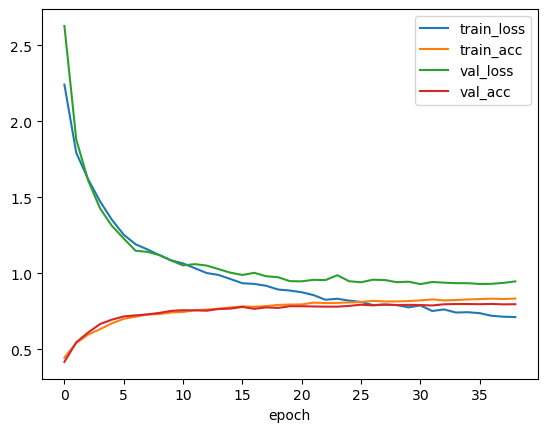

In [59]:
plt.figure()

plt.plot(history.history['loss'], label = 'train_loss')
plt.plot(history.history['accuracy'], label = 'train_acc')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.plot(history.history['val_accuracy'], label = 'val_acc')

plt.legend()
plt.xlabel('epoch')
plt.show()